<a href="https://colab.research.google.com/github/Abhinand20/MachineLearning/blob/master/PolyhedralDiceClassifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
keep_prob = 0.7

train_dir = os.path.join('/content/gdrive/My Drive/Kaggle/dice-d4-d6-d8-d10-d12-d20/dice/train')

test_dir = os.path.join('/content/gdrive/My Drive/Kaggle/dice-d4-d6-d8-d10-d12-d20/dice/valid')

if not os.path.isdir('models'):
    os.makedirs('models')

In [0]:
def create_model():
    model = Sequential()
    model.add(Conv2D(64 , (3,3) , activation = 'relu', input_shape = (300,300,3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64 , (3,3) , activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(32 , (3,3) , activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(keep_prob))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(6, activation= 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=0.0001), metrics = ['accuracy'])
    
    return model


In [0]:
def train_model(model):
    train_datagen = ImageDataGenerator(rescale=1./255.)
    test_datagen = ImageDataGenerator(rescale=1./255.)

    train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (300,300),
    batch_size = 10,
    class_mode='categorical')

    test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (300,300),
    batch_size = 10,
    class_mode='categorical')
    
    train_steps = len(train_generator)
    test_steps = len(test_generator)
    history = model.fit_generator(
            train_generator,
            steps_per_epoch = train_steps,
            epochs = 10,
            verbose = 2,
            validation_data = test_generator,
            validation_steps = test_steps
            )
    return history

In [5]:
model = create_model()
history = train_model(model)

Found 14284 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.
Epoch 1/10
 - 130s - loss: 1.1924 - accuracy: 0.5323 - val_loss: 0.3152 - val_accuracy: 0.7702
Epoch 2/10
 - 127s - loss: 0.5773 - accuracy: 0.7842 - val_loss: 0.0902 - val_accuracy: 0.9015
Epoch 3/10
 - 127s - loss: 0.3232 - accuracy: 0.8877 - val_loss: 0.1316 - val_accuracy: 0.9510
Epoch 4/10
 - 127s - loss: 0.2075 - accuracy: 0.9278 - val_loss: 0.0361 - val_accuracy: 0.9667
Epoch 5/10
 - 128s - loss: 0.1454 - accuracy: 0.9509 - val_loss: 0.0137 - val_accuracy: 0.9596
Epoch 6/10
 - 128s - loss: 0.1142 - accuracy: 0.9618 - val_loss: 0.0118 - val_accuracy: 0.9724
Epoch 7/10
 - 127s - loss: 0.0938 - accuracy: 0.9693 - val_loss: 9.3695e-04 - val_accuracy: 0.9681
Epoch 8/10
 - 127s - loss: 0.0724 - accuracy: 0.9736 - val_loss: 2.4795e-04 - val_accuracy: 0.9753
Epoch 9/10
 - 128s - loss: 0.0717 - accuracy: 0.9771 - val_loss: 0.0057 - val_accuracy: 0.9734
Epoch 10/10
 - 127s - loss: 0.0624 - accuracy: 0.979

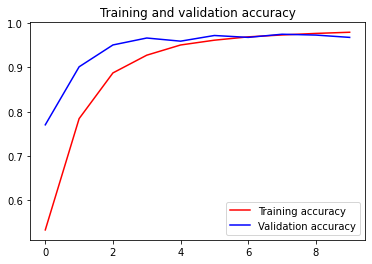

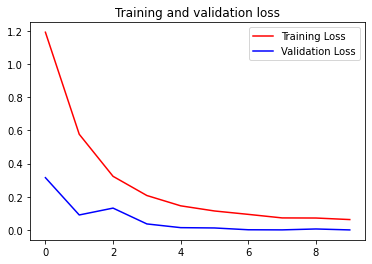

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d ucffool/dice-d4-d6-d8-d10-d12-d20-images

100% 674M/676M [00:18<00:00, 42.9MB/s]
100% 676M/676M [00:18<00:00, 38.8MB/s]


In [5]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: dice/train/d6/d6_top_0784.jpg  
  inflating: dice/train/d6/d6_top_0785.jpg  
  inflating: dice/train/d6/d6_top_0786.jpg  
  inflating: dice/train/d6/d6_top_0787.jpg  
  inflating: dice/train/d6/d6_top_0788.jpg  
  inflating: dice/train/d6/d6_top_0789.jpg  
  inflating: dice/train/d6/d6_top_0790.jpg  
  inflating: dice/train/d6/d6_top_0792.jpg  
  inflating: dice/train/d6/d6_top_0793.jpg  
  inflating: dice/train/d6/d6_top_0794.jpg  
  inflating: dice/train/d6/d6_top_0795.jpg  
  inflating: dice/train/d6/d6_top_0796.jpg  
  inflating: dice/train/d6/d6_top_0797.jpg  
  inflating: dice/train/d6/d6_top_0798.jpg  
  inflating: dice/train/d6/d6_top_0800.jpg  
  inflating: dice/train/d6/d6_top_0801.jpg  
  inflating: dice/train/d6/d6_top_0802.jpg  
  inflating: dice/train/d6/d6_top_0803.jpg  
  inflating: dice/train/d6/d6_top_0804.jpg  
  inflating: dice/train/d6/d6_top_0805.jpg  
  inflating: dice/train/d6/d6_top_0806.jpg  
  in

In [6]:
rm \*.zip

rm: cannot remove '*.zip': No such file or directory
